## SCRAPING SITO DEL CENTRO RICERCA IN DATA SCIENCE BOCCONI

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url ="https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/faculty+and+research/research/research+centers/" 
#"https://www.bidsa.unibocconi.eu/wps/wcm/connect/Site/Bidsa/Home"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>

RESEARCH CENTERS - Bocconi University Milan



In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
lista_url2 = list(filter(lambda x: x.startswith('https://www.unibocconi.eu'), res))
lista_url3=list(set(lista_url2))
lista_url3

['https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/campus+and+services/bocconi+urban+campus/new+campus/',
 'https://www.unibocconi.eu/wps/wcm/connect/Bocconi/SitoPubblico_EN/Navigation+Tree/info/prospective+bsc+students/',
 'https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/campus+and+services/bocconi+urban+campus/gallery/',
 'https://www.unibocconi.eu/wps/wcm/connect/Bocconi/SitoPubblico_EN/Navigation+Tree/Home/faculty+and+research/research/ethics+committee/',
 'https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/faculty+and+research/departments/finance/',
 'https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/campus+and+services/bocconi+urban+campus/',
 'https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/about+us/statute+regulations+and+documents/',
 'https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopu

In [4]:
matchers = [ 'centers'] #'research',
lista_url3 = [s for s in lista_url2 if any(xs in s for xs in matchers)]
lista_url3=list(set(lista_url3))
lista_url3

['https://www.unibocconi.eu/wps/wcm/connect/bocconi/sitopubblico_en/navigation+tree/home/faculty+and+research/research/research+centers/']

In [5]:
texts = []
title= []
for url in lista_url3[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"ContentMain"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['\nRESEARCH CENTERS - Bocconi University Milan\n']

In [6]:
texts[0]

'\n\nRESEARCH CENTERS\n\nPermanent Research Centers\nASK Centre for Research on Management and Economics of Arts and Culture Institutions (Study centre on the economics and management of the arts and culture)\nBAFFI CAREFIN\xa0\nCentre for Applied Research on International Markets, Banking, Finance and Regulation\nBIDSA Bocconi Institute for Data Science and Analytics\nCERGAS Centre for Research on Health and Social Care\xa0Management (Institutional stuctures; management of public and private companies providing healthcare and social services)\nDONDENA Carlo F. Dondena Centre for Research on Social Dynamics and Public Policy (Interdisciplinary research on social cohesion, demography, life course dynamics and public policy)\nGREEN (the Center brings together and expands the activities of CERTet and IEFE) Centre for Geography, Resources, Environment, Energy and Networks\nICRIOS The Invernizzi Center for Research on Innovation, Organization, Strategy and Entrepreneurship\nIGIER Innocenzo 

In [7]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',''))

#print(texts2)

In [8]:
texts2[0]

'RESEARCH CENTERSPermanent Research CentersASK Centre for Research on Management and Economics of Arts and Culture Institutions (Study centre on the economics and management of the arts and culture)BAFFI CAREFIN\xa0Centre for Applied Research on International Markets, Banking, Finance and RegulationBIDSA Bocconi Institute for Data Science and AnalyticsCERGAS Centre for Research on Health and Social Care\xa0Management (Institutional stuctures; management of public and private companies providing healthcare and social services)DONDENA Carlo F. Dondena Centre for Research on Social Dynamics and Public Policy (Interdisciplinary research on social cohesion, demography, life course dynamics and public policy)GREEN (the Center brings together and expands the activities of CERTet and IEFE) Centre for Geography, Resources, Environment, Energy and NetworksICRIOS The Invernizzi Center for Research on Innovation, Organization, Strategy and EntrepreneurshipIGIER Innocenzo Gasparini Institute for Ec

In [9]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    texts3.append(element)

In [10]:
texts3[0]

'RESEARCH Research for Research on Management and Economics of and Culture ( Study on the economics and management of the and culture ) for Applied Research on International , Banking , Finance and Institute for Data Science and for Research on Health and Social Care Management ( Institutional ; management of public and private providing and social ) F . for Research on Social Dynamics and Public Policy ( research on social cohesion , demography , life course dynamics and public policy ) GREEN ( the Center together and the of and ) for Geography , , Environment , Energy and The Center for Research on Innovation , Organization , Strategy and Institute for Economic Research Part of the Institute of Economics , it jointly with two international , the US - based , National Bureau of Economic Research , and the - based , for Economic Policy Research ( Economics and economic policy ) Intelligence Crisis Lab Laboratory for Crisis Laboratory for Effective Anti - poverty Foundation Other and is

### TEXT CLEANING

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [12]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

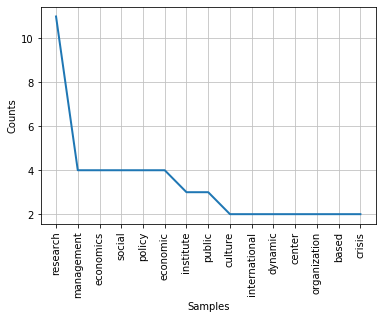

In [13]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts3[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [14]:
results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
results

,Title,Freq_word
0,\nRESEARCH CENTERS - Bocconi University Milan\n,"{'research': 11, 'management': 4, 'economics':..."


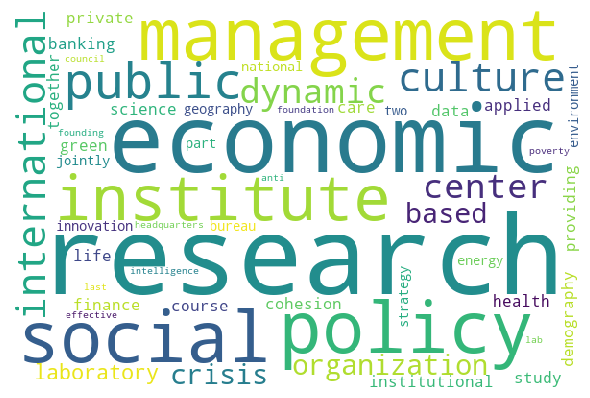

In [15]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[0]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

In [16]:
tot_text = ''.join(map(str, clean_texts))

In [17]:
tot_text=' '.join( [w for w in tot_text.split() if len(w)>1] )
tot_text = ''.join(i for i in tot_text if not i.isdigit())
type(tot_text)

str

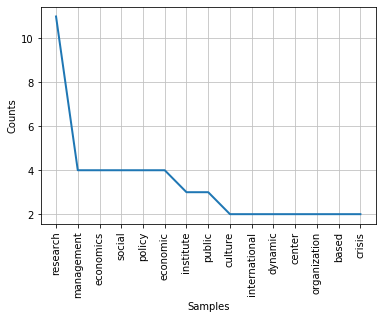

In [18]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [19]:
Bocconi = open('Bocconi.txt', 'w')
Bocconi.write(tot_text)
Bocconi.close()

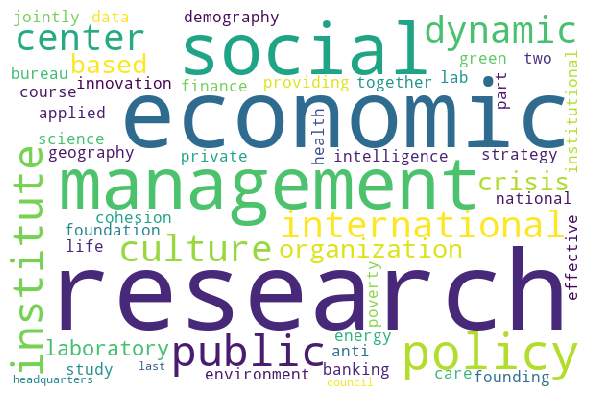

In [20]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()